In [1]:
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt

In [2]:
datagen = N2V_DataGenerator()

In [3]:
imgs = datagen.load_imgs_from_directory(directory="data/", filter='*.png', dims='YXC')
imgs[0] = imgs[0][...,:3]
print('shape without alpha:    ',imgs[0].shape)

shape without alpha:     (1, 1100, 2800, 3)


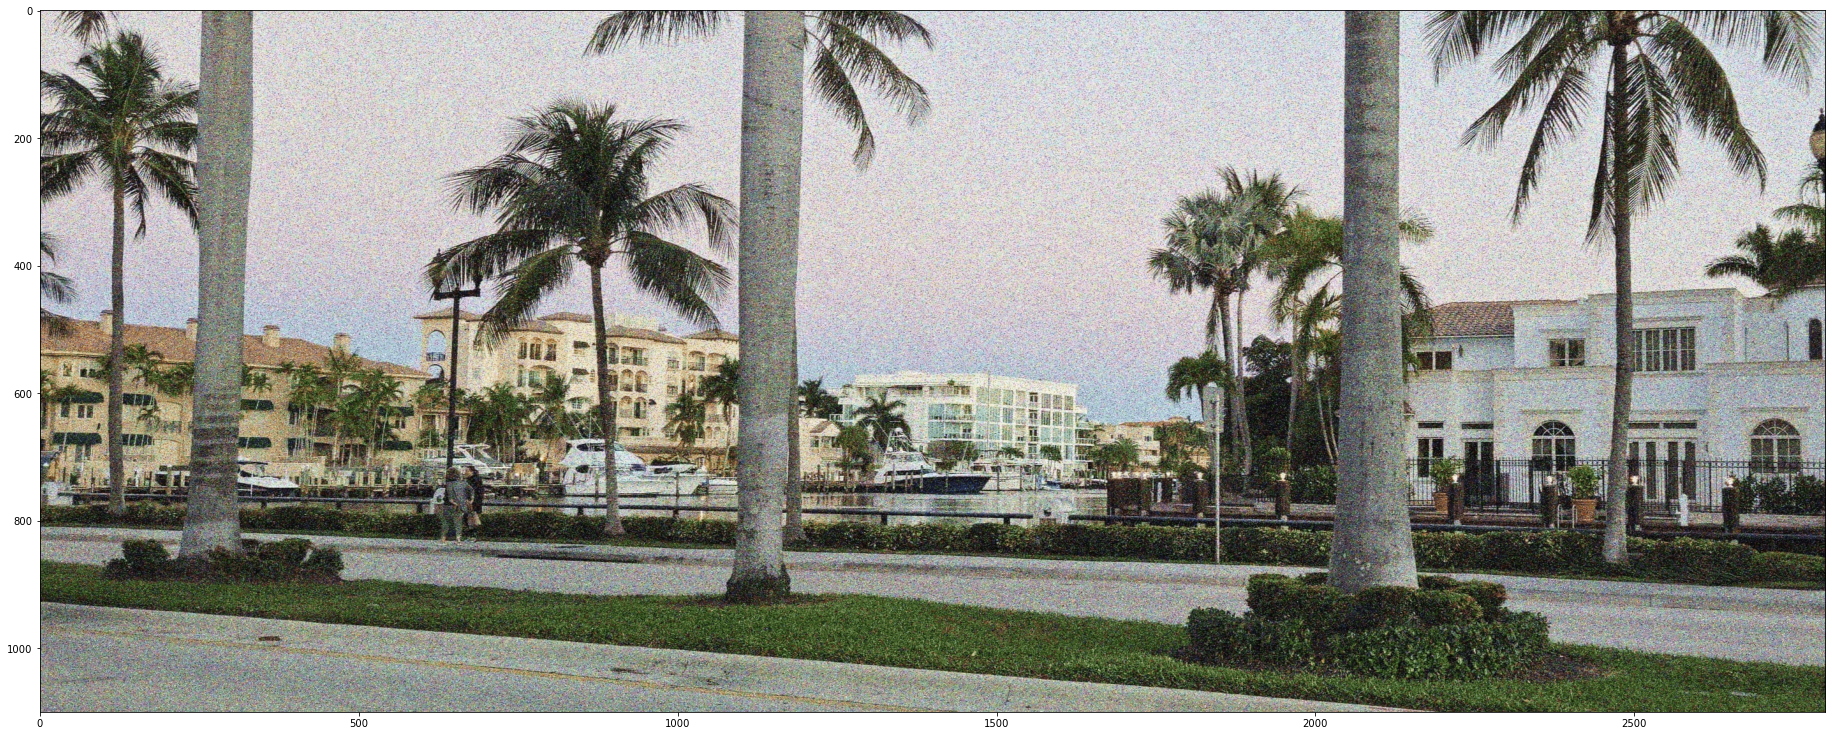

In [4]:
plt.figure(figsize=(32,16))
plt.imshow(imgs[0][0,...])
plt.show()

In [5]:
patch_shape=(64,64)
patches = datagen.generate_patches_from_list(imgs, shape=patch_shape)

Generated patches: (5848, 64, 64, 3)


In [6]:
X = patches[:5000]
X_val = patches[5000:]

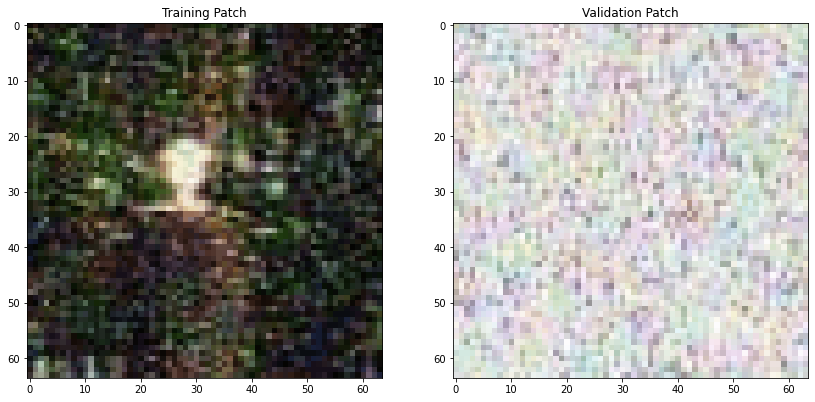

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...])
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...])
plt.title('Validation Patch');

In [8]:

config = N2VConfig(X, unet_kern_size=3, 
                   unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/128), train_epochs=5, train_loss='mse', 
                   batch_norm=True, train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['0.55077004', '0.55216897', '0.5208264'],
 'stds': ['0.26669264', '0.26007652', '0.28562003'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 3,
 'n_channel_out': 3,
 'unet_residual': False,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 64,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 3),
 'train_loss': 'mse',
 'train_epochs': 5,
 'train_steps_per_epoch': 39,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': False,
 'blurpool': False,
 'skip_skipone': False,
 'structN2Vmask': None,
 'probabilistic': False}

In [9]:
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config, model_name, basedir=basedir)

C:\Users\ABHISHEK\anaconda3\lib\site-packages\n2v\models\n2v_standard.py:447: UserWarning: output path for model already exists, files may be overwritten: C:\Users\ABHISHEK\Desktop\denoising\models\n2v_2D
  warnings.warn(


In [10]:
history = model.train(X, X_val)

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 848/848 [00:00<00:00, 1116.71it/s]


Epoch 1/5
39/39 [==============================] - 461s 12s/step - loss: 0.3847 - n2v_mse: 0.3847 - n2v_abs: 0.4209 - val_loss: 0.5257 - val_n2v_mse: 0.5255 - val_n2v_abs: 0.6143 - lr: 4.0000e-04
Epoch 2/5
39/39 [==============================] - 416s 11s/step - loss: 0.0585 - n2v_mse: 0.0585 - n2v_abs: 0.1858 - val_loss: 0.4498 - val_n2v_mse: 0.4496 - val_n2v_abs: 0.5679 - lr: 4.0000e-04
Epoch 3/5
39/39 [==============================] - 384s 10s/step - loss: 0.0434 - n2v_mse: 0.0434 - n2v_abs: 0.1600 - val_loss: 0.3739 - val_n2v_mse: 0.3738 - val_n2v_abs: 0.5149 - lr: 4.0000e-04
Epoch 4/5
39/39 [==============================] - 393s 10s/step - loss: 0.0336 - n2v_mse: 0.0336 - n2v_abs: 0.1410 - val_loss: 0.3257 - val_n2v_mse: 0.3256 - val_n2v_abs: 0.4788 - lr: 4.0000e-04
Epoch 5/5
39/39 [==============================] - 393s 10s/step - loss: 0.0302 - n2v_mse: 0.0302 - n2v_abs: 0.1335 - val_loss: 0.2879 - val_n2v_mse: 0.2876 - val_n2v_abs: 0.4437 - lr: 4.0000e-04

Loading network wei

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


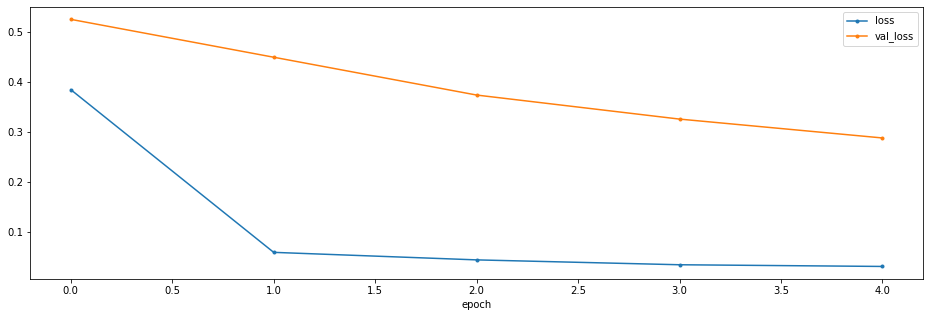

In [11]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

In [12]:
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [13]:
from matplotlib.image import imread, imsave
img = imread('data/img3.png')[...,:3]
pred = model.predict(img, axes='YXC')

1/1 [==============================] - 11s 11s/step


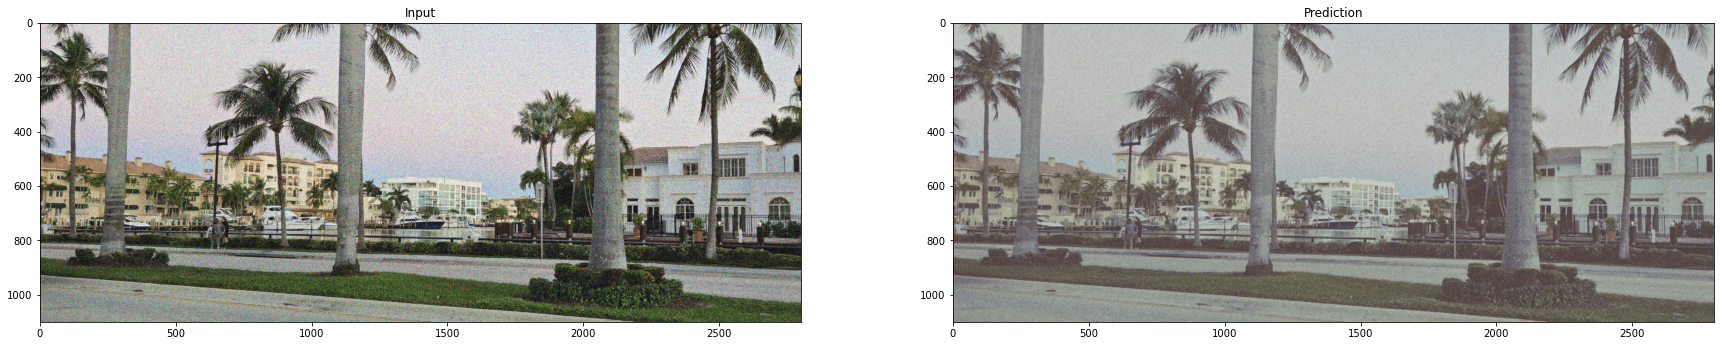

In [14]:
plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.imshow( img[:,...] )
plt.title('Input');

plt.subplot(1,2,2)
plt.imshow( pred[:,...] )
plt.title('Prediction');

In [15]:
from matplotlib.image import imsave
imsave('img3.png', np.clip(pred,0.0,1.0))